# IBM Applied Data Science Capstone Project - The Battle of Neighborhoods

##                                                                                               Week 1 

### >> Introduction
#### _Problem Description & Discussion of the Background_

Consider a scenario where one wants to find a house in Silicon Valley. We narrow down the search into 5 cities in South Bay & East Bay areas: Cupertino, Sunnyvale, Milpitas, Fremont and Pleasanton. First of all, we want to know where they are, as well as some basic information - such as population, median household income, median house value, top employers and local schools. Then we will dig a little bit more details, such as demographics profile, population change in recent years, & education ratings. As we may not be able to obtain all the data from one single source, we want to do a comparison of one single dataset from various sources. Furthermore, we want to explore the neighborhoods (using zipcode to represent) and find out whether there are similar neighborhoods in more affordable areas with those in the expensive areas.

### >> Data framing & Methodology
#### _Description of the data and how it will be used to solve the problem_

*Demographic information* and *Zipcode* are obtained from **Zipcode.org**. Information of *demographics profile, population of 2010* from the United States Census, *estimated population of 2019* and *local top employers* are obtained from **Wikipedia**. Getting **Niche** grades for *Public schools, Housing, Good for families* and *Cost of living* and median house value, median household income, high school names from its website.
From **Opendatasoft**, we retrieve *latitude and longitude* information for each zipcode. With them, we make enquiry to **Foursquare** for location data.

**Data Sources** <br>
[zipcode.org](https://zipcode.org/state/california "California Zipcode Data") <br>
[wikipedia.org](https://en.wikipedia.org/wiki/Main_Page "Wiki Main Page") <br>
[niche.com](https://www.niche.com/?ref=places-to-live "Places to Live") <br>
[opendatasoft.com](https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/ "Zipcode Geographic Data") <br>
[foursquare.com](https://foursquare.com/developers/apps "Foursquare API")

--> Using **Folium**, the regional map is displayed. <br>
Then **Pandas** DataFrame is created through the collected information from Zipcode.org, Wikipedia and NICHE respectively. <br>
For Visualization, **Matplotlib** & **Seaborn** are used for plotting: <br>
1, Population and Demographics Profile <br>
2, Population Change from 2010 to 2019 <br>
3, Median House Value and Household Income <br>
4, Population Data Comparison from Zipcode.org, Wikipedia and NICHE <br>
With these, we combine three dataframes into one Dataframe to summarize all the information we want to know except for location data. <br>
For instance: city, population, public school ratings, median house value and household income, rent, high schools, top local employers, zipcodes (neighborhoods).

>> Print each Zipcode along with the top 5 most common venues from **Foursquare**. <br>
>> Explore and cluster the neighborhoods using *K-Means clustering* from machine learning library **SciKit Learn**. <br>
>> Visualize the resulting clusters on regional map with **Folium** with colored zipcode dots representing different neighborhood category type.

## Week 2
All the inferences hereforth includes code process of exploring, segmenting & clustering the data.
The remaining three sections - **Results**, **Discussion**, & **Conclusion** are summarized from the whole methodology results and added in the end as a continuous report to the above **Introduction** & **Data Methodology**

In [2]:
# Importing all the required libraries
import pandas as pd
import numpy as np

!pip install folium
import folium # map rendering library

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import json # To handle JSON files
import requests # To handle requests
from pandas.io.json import json_normalize # To tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans
print('Libraries imported.')

     |████████████████████████████████| 94 kB 5.5 MB/s  eta 0:00:01
Libraries imported.


### Area Mapping: Cities of Cupertino, Sunnyvale, Milpitas, Fremont and Pleasanton

In [4]:
# Map creation of San Jose, California with latitude: 37.3382° N & Longitude: 121.8863° W values
Map_SanJose = folium.Map(location=[37.5082,-121.9863],zoom_start=10)
Map_SanJose

#### Demographic Data Sources for the cities <br>
[Cupertino](https://zipcode.org/city/CA/CUPERTINO "Cupertino Geo") <br>
[Sunnyvale](https://zipcode.org/city/CA/SUNNYVALE "Sunnyvale Geo") <br>
[Milpitas](https://zipcode.org/city/CA/MILPITAS "Milpitas Geo") <br>
[Fremont](https://zipcode.org/city/CA/FREMONT "Fremont Geo") <br>
[Pleasanton](https://zipcode.org/city/CA/PLEASANTON "Pleasanton Geo")

In [5]:
# Extracting the required Demographic information from the sources
Cupertino = ['Cupertino','54412', '27209', '412', '2351', '24156','$654900', '$100020', '95014, 95015']
Sunnyvale = ['Sunnyvale', '131018', '69904', '2891', '19852', '42414', '$452400', '$74240', '94085, 94086, 94087, 94088, 94089']
Milpitas = ['Milpitas', '62840', '19480', '2295', '10432', '32487', '$373000', '$84565', '95035, 95036']
Fremont = ['Fremont', '203417', '97074', '6316', '27500', '75011', '$382700','$81142', '94536, 94537, 94538, 94539, 94555']
Pleasanton = ['Pleasanton', '65221', '52509', '886', '5126', '7571', '$436800', '$91376', '94566, 94588']

In [7]:
# Defining the Dataframe Columns
column_names = ['City','Population','White', 'Black', 'Hispanic', 'Asian', 'House_Value', 'Household_Income', 'Zipcode']

# Dataframe Instantiation
df = pd.DataFrame(columns = column_names, data = [Cupertino, Sunnyvale, Milpitas, Fremont, Pleasanton])
df

,City,Population,White,Black,Hispanic,Asian,House_Value,Household_Income,Zipcode
0,Cupertino,54412,27209,412,2351,24156,$654900,$100020,"95014, 95015"
1,Sunnyvale,131018,69904,2891,19852,42414,$452400,$74240,"94085, 94086, 94087, 94088, 94089"
2,Milpitas,62840,19480,2295,10432,32487,$373000,$84565,"95035, 95036"
3,Fremont,203417,97074,6316,27500,75011,$382700,$81142,"94536, 94537, 94538, 94539, 94555"
4,Pleasanton,65221,52509,886,5126,7571,$436800,$91376,"94566, 94588"


In [8]:
# Data types
df.dtypes

City                object
Population          object
White               object
Black               object
Hispanic            object
Asian               object
House_Value         object
Household_Income    object
Zipcode             object
dtype: object

In [16]:
# Changing data types of numbered values to 'int' (integer)
df[['Population', 'White', 'Black', 'Hispanic', 'Asian']] = df[['Population', 'White', 'Black', 'Hispanic', 'Asian']].astype(int)
df.dtypes

City                object
Population           int64
White                int64
Black                int64
Hispanic             int64
Asian                int64
House_Value         object
Household_Income    object
Zipcode             object
dtype: object

### Population Data Visualization using Seaborn & Matplotlib Libraries

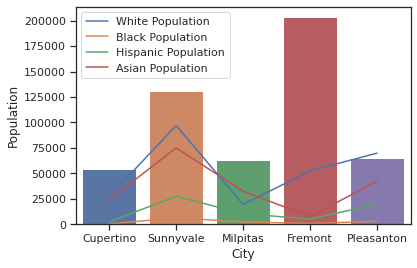

In [10]:
sns.set(style = 'ticks') # White background

sns.lineplot(x = 'City', y = 'White', data = df, label = 'White Population')
sns.lineplot(x = 'City', y = 'Black', data = df, label = 'Black Population')
sns.lineplot(x = 'City', y = 'Hispanic', data = df, label = 'Hispanic Population')
sns.lineplot(x = 'City', y = 'Asian', data = df, label = 'Asian Population')
sns.barplot(x = 'City', y = 'Population', data = df)

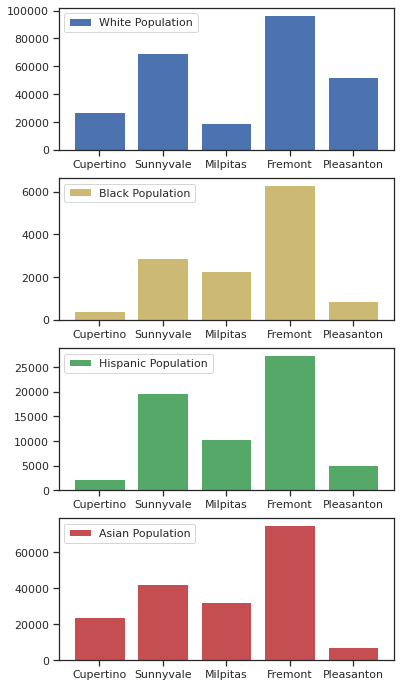

In [12]:
# City-wise Population Demographics

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.bar(df.City, df.White, color = 'b', label='White Population')
ax2.bar(df.City, df.Black, color = 'y', label='Black Population')    
ax3.bar(df.City, df.Hispanic, color = 'g', label='Hispanic Population')
ax4.bar(df.City, df.Asian, color = 'r', label='Asian Population')  

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig = plt.gcf()
fig.set_size_inches(6, 12)

#### Data Stats from Wikipedia <br>
[Cupertino Wiki](https://en.wikipedia.org/wiki/Cupertino,_California "Cupertino Wikia") <br>
[Sunnyvale Wiki](https://en.wikipedia.org/wiki/Sunnyvale,_California "Sunnyvale Wikia") <br>
[Milpitas Wiki](https://en.wikipedia.org/wiki/Milpitas,_California "Milpitas Wikia") <br>
[Fremont Wiki](https://en.wikipedia.org/wiki/Fremont,_California "Fremont Wikia") <br>
[Pleasanton Wiki](https://en.wikipedia.org/wiki/Pleasanton,_California "Pleasanton Wikia")

In [13]:
# Extracting the required info for framing the data
Cupertino_Wiki = ['Cupertino','59276', '58302', '18270', '344', '2113', '36895','$118635', 'Apple, Seagate']
Sunnyvale_Wiki = ['Sunnyvale', '152703', '140081', '48323', '2533', '26517', '57012', 'NaN', 'Google, Juniper, Lockheed Martin, Yahoo!, LinkedIn']
Milpitas_Wiki = ['Milpitas', '84196', '66790', '9751', '1836', '11240', '41308','$84429', 'Cisco, KLA, Sandisk, Flex']
Fremont_Wiki = ['Fremont', '241110', '214089', '56766', '6743', '31698', '107679','$122191', 'Tesla, Lam, Western Digital, Boston Scientific']
Pleasanton_Wiki = ['Pleasanton', '81777', '70285', '42738', '1116', '7264 ', '16209','$121622 ', 'Workday, Kaiser Permanente, Oracle, Safeway']

In [14]:
# Dataframe Columns
column_wiki = ['City','Pop_Estimate2019','Population_2010','White', 'Black', 'Hispanic', 'Asian', 'Household_Income', 'Top_Employers']

# Dataframe Instantiation
df_wiki = pd.DataFrame(columns = column_wiki, data = [Cupertino_Wiki, Sunnyvale_Wiki, Milpitas_Wiki, Fremont_Wiki, Pleasanton_Wiki])
df_wiki

,City,Pop_Estimate2019,Population_2010,White,Black,Hispanic,Asian,Household_Income,Top_Employers
0,Cupertino,59276,58302,18270,344,2113,36895,$118635,"Apple, Seagate"
1,Sunnyvale,152703,140081,48323,2533,26517,57012,NaN,"Google, Juniper, Lockheed Martin, Yahoo!, Link..."
2,Milpitas,84196,66790,9751,1836,11240,41308,$84429,"Cisco, KLA, Sandisk, Flex"
3,Fremont,241110,214089,56766,6743,31698,107679,$122191,"Tesla, Lam, Western Digital, Boston Scientific"
4,Pleasanton,81777,70285,42738,1116,7264,16209,$121622,"Workday, Kaiser Permanente, Oracle, Safeway"


In [15]:
# Datatypes
df_wiki.dtypes

City                object
Pop_Estimate2019    object
Population_2010     object
White               object
Black               object
Hispanic            object
Asian               object
Household_Income    object
Top_Employers       object
dtype: object

In [17]:
# Changing the data types of numbered values to 'int' (integer)
df_wiki[['Pop_Estimate2019', 'Population_2010', 'White','Black', 'Hispanic', 'Asian']] = df_wiki[['Pop_Estimate2019', 'Population_2010', 'White','Black', 'Hispanic', 'Asian']].astype(int)
df_wiki.dtypes

City                object
Pop_Estimate2019     int64
Population_2010      int64
White                int64
Black                int64
Hispanic             int64
Asian                int64
Household_Income    object
Top_Employers       object
dtype: object

### Plotting the Population Change from 2010 to 2019 using Seaborn Library

Text(0, 0.5, 'Population')

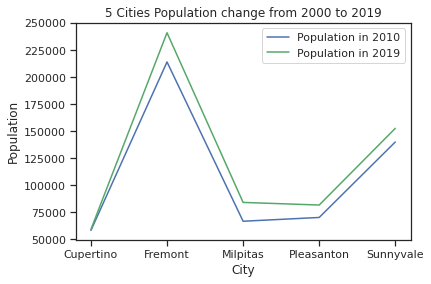

In [18]:
sns.set(style = 'ticks') # White background

sns.lineplot(x = 'City', y = 'Population_2010', data = df_wiki, color = 'b', label = 'Population in 2010')
sns.lineplot(x = 'City', y = 'Pop_Estimate2019', data = df_wiki, color = 'g', label = 'Population in 2019')

plt.title ('5 Cities Population change from 2000 to 2019')
plt.xlabel ('City')
plt.ylabel ('Population')

#### Data from Niche for Locational Stats <br>
[Cupertino - Niche](https://www.niche.com/places-to-live/cupertino-santa-clara-ca/ "Cupertino Niche") <br>
[Sunnyvale - Niche](https://www.niche.com/places-to-live/sunnyvale-santa-clara-ca/ "Sunnyvale Niche") <br>
[Milpitas - Niche](https://www.niche.com/places-to-live/milpitas-santa-clara-ca/ "Milpitas Niche") <br>
[Fremont - Niche](https://www.niche.com/places-to-live/fremont-alameda-ca/ "Fremont Niche") <br>
[Pleasanton - Niche](https://www.niche.com/places-to-live/pleasanton-alameda-ca/ "Pleasanton Niche")

In [19]:
# Extracting the Niche grades & demographic data for framing
Cupertino_Niche = ['Cupertino','60614', 'A+', 'C+', 'A+', 'D','1584600', '3005', '163954', 'Mountain View']
Sunnyvale_Niche = ['Sunnyvale', '152323', 'A', 'C+', 'A+', 'D+','1111800', '2332', '131791', 'Monta Vista, Homestead, Cupertino']
Milpitas_Niche = ['Milpitas', '77457', 'A', 'C', 'A', 'D','782300', '2241', '125161', 'Milpitas']
Fremont_Niche = ['Fremont', '233083', 'A', 'C', 'A', 'D','863800', '2188', '127374', 'Mission San Jose, Irvington, American']
Pleasanton_Niche = ['Pleasanton', '80847', 'A+', 'C+', 'A+', 'D+','933500','2251', '148852', 'Amador Valley, Foothill']

In [20]:
# Dataframe Columns
column_niche = ['City','Population','Public_Schools','Housing', 'Good_for_Families', 'Cost_of_Living', 'House_Value', 'Rent', 'Household_Income', 'High_Schools']

# Dataframe Instantiation
df_niche = pd.DataFrame(columns = column_niche, data = [Cupertino_Niche, Sunnyvale_Niche, Milpitas_Niche, Fremont_Niche, Pleasanton_Niche])
df_niche

,City,Population,Public_Schools,Housing,Good_for_Families,Cost_of_Living,House_Value,Rent,Household_Income,High_Schools
0,Cupertino,60614,A+,C+,A+,D,1584600,3005,163954,Mountain View
1,Sunnyvale,152323,A,C+,A+,D+,1111800,2332,131791,"Monta Vista, Homestead, Cupertino"
2,Milpitas,77457,A,C,A,D,782300,2241,125161,Milpitas
3,Fremont,233083,A,C,A,D,863800,2188,127374,"Mission San Jose, Irvington, American"
4,Pleasanton,80847,A+,C+,A+,D+,933500,2251,148852,"Amador Valley, Foothill"


In [22]:
# Datatypes
df_niche.dtypes

City                 object
Population           object
Public_Schools       object
Housing              object
Good_for_Families    object
Cost_of_Living       object
House_Value          object
Rent                 object
Household_Income     object
High_Schools         object
dtype: object

In [23]:
# Changing the data types of numbered values to 'int' (integer)
df_niche[['Population', 'Rent', 'House_Value', 'Household_Income']] = df_niche[['Population', 'Rent', 'House_Value', 'Household_Income']].astype(int)
df_niche.dtypes

City                 object
Population            int64
Public_Schools       object
Housing              object
Good_for_Families    object
Cost_of_Living       object
House_Value           int64
Rent                  int64
Household_Income      int64
High_Schools         object
dtype: object

### Plotting the Median House Value & Household Income using Seaborn Library

Text(0, 0.5, 'Media $')

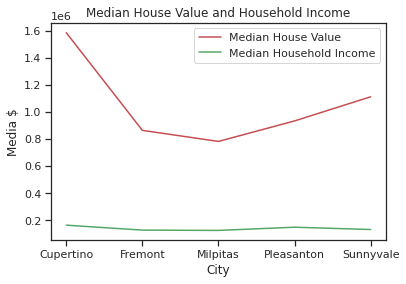

In [24]:
sns.set(style = 'ticks') # White background

sns.lineplot(x = 'City', y = 'House_Value', data = df_niche, color = 'r', label = 'Median House Value')
sns.lineplot(x = 'City', y = 'Household_Income', data = df_niche, color = 'g', label = 'Median Household Income')

plt.title ('Median House Value and Household Income')
plt.xlabel ('City')
plt.ylabel ('Media $')

### Comparison of Population Data from the above different sources

Text(0, 0.5, 'Population')

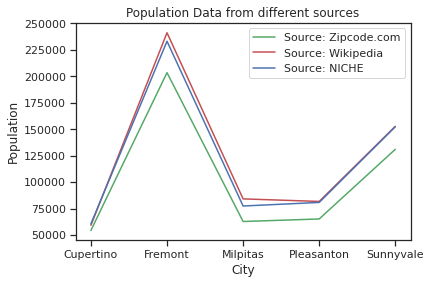

In [25]:
sns.set(style = 'ticks') # White background

sns.lineplot(x = 'City', y = 'Population', data = df, color = 'g', label = 'Source: Zipcode.com')
sns.lineplot(x = 'City', y = 'Pop_Estimate2019', data = df_wiki, color = 'r', label = 'Source: Wikipedia')
sns.lineplot(x = 'City', y = 'Population', data = df_niche, color = 'b', label = 'Source: NICHE')

plt.title ('Population Data from different sources')
plt.xlabel ('City')
plt.ylabel ('Population')

### Combine all the Datasets for a single Dataframe

In [26]:
df_combined = df_niche
df_combined[['Top_Employers']] = df_wiki[['Top_Employers']]
df_combined[['Zipcode']] = df[['Zipcode']]
df_combined

,City,Population,Public_Schools,Housing,Good_for_Families,Cost_of_Living,House_Value,Rent,Household_Income,High_Schools,Top_Employers,Zipcode
0,Cupertino,60614,A+,C+,A+,D,1584600,3005,163954,Mountain View,"Apple, Seagate","95014, 95015"
1,Sunnyvale,152323,A,C+,A+,D+,1111800,2332,131791,"Monta Vista, Homestead, Cupertino","Google, Juniper, Lockheed Martin, Yahoo!, Link...","94085, 94086, 94087, 94088, 94089"
2,Milpitas,77457,A,C,A,D,782300,2241,125161,Milpitas,"Cisco, KLA, Sandisk, Flex","95035, 95036"
3,Fremont,233083,A,C,A,D,863800,2188,127374,"Mission San Jose, Irvington, American","Tesla, Lam, Western Digital, Boston Scientific","94536, 94537, 94538, 94539, 94555"
4,Pleasanton,80847,A+,C+,A+,D+,933500,2251,148852,"Amador Valley, Foothill","Workday, Kaiser Permanente, Oracle, Safeway","94566, 94588"


#### Demographics from Opendatasoft for the Zipcodes <br>
[public.opendatasoft.com](https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/ "Geo for Zipcodes")

In [27]:
# Extracting the geospatial data from the source only for the listed cities in this project
Z95014 = ['95014', 'Cupertino', '37.318', '-122.048']
Z95015 = ['95015', 'Cupertino', '37.189', '-121.705']
Z94085 = ['94085', 'Sunnyvale', '37.389', '-122.018']
Z94086 = ['94086', 'Sunnyvale', '37.378', '-122.024']
Z94087 = ['94087', 'Sunnyvale', '37.350', '-122.036' ]
Z94088 = ['94088', 'Sunnyvale', '37.189', '-121.705' ]
Z94089 = ['94089', 'Sunnyvale', '37.406', '-122.008']
Z95035 = ['95035', 'Milpitas', '37.436', '-121.894']
Z95036 = ['95036', 'Milpitas', '37.457', '-121.914']
Z94536 = ['94536', 'Fremont', '37.562', '-121.994']
Z94537 = ['94537', 'Fremont', '37.680', '-121.921']
Z94538 = ['94538', 'Fremont', '37.527', '-121.968']
Z94539 = ['94539', 'Fremont', '37.515', '-121.929']
Z94555 = ['94555', 'Fremont', '37.572', '-122.051' ]
Z94566 = ['94566', 'Pleasanton', '37.659', '-121.871']
Z94588 = ['94588', 'Pleasanton', '37.690', '-121.892']

In [28]:
# Dataframe Columns
column_zipcode = ['Zipcode', 'City','Latitude','Longitude']

# Dataframe Instantiation
df_zipcode = pd.DataFrame(columns = column_zipcode, data = [Z95014, Z95015, Z94085, Z94086, Z94087, Z94088, Z94089, Z95035, Z95036, Z94536, Z94537, Z94538, Z94539, Z94555, Z94566, Z94588])
df_zipcode

,Zipcode,City,Latitude,Longitude
0,95014,Cupertino,37.318,-122.048
1,95015,Cupertino,37.189,-121.705
2,94085,Sunnyvale,37.389,-122.018
3,94086,Sunnyvale,37.378,-122.024
4,94087,Sunnyvale,37.350,-122.036
5,94088,Sunnyvale,37.189,-121.705
6,94089,Sunnyvale,37.406,-122.008
7,95035,Milpitas,37.436,-121.894
8,95036,Milpitas,37.457,-121.914
9,94536,Fremont,37.562,-121.994


In [29]:
# Datatypes
df_zipcode.dtypes

Zipcode      object
City         object
Latitude     object
Longitude    object
dtype: object

In [30]:
# Changing the data types of Latitude & Longitude to 'float' (decimal no.s)
df_zipcode[['Latitude', 'Longitude']]=df_zipcode[['Latitude', 'Longitude']].astype(float)
df_zipcode.dtypes

Zipcode       object
City          object
Latitude     float64
Longitude    float64
dtype: object

### Exploring & Clustering of the Neighborhoods
#### Mapping the Neighborhoods (Zipcodes) superimposed on top

#### || Foursquare API Credentials ||

In [31]:
CLIENT_ID = 'N0LL5OHRXIFDHAELQZ2ARRVCTS12EQBZWUC1AN3VC35NPDU1' # Foursquare ID
CLIENT_SECRET = '3JOT3A02EILN3IGJE4VPPRZR13DU0RGZCLTXDRITUNRUMRWC' # Foursquare Secret/Key
VERSION = '20180605' # Foursquare API Version

print('Credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentials:
CLIENT_ID: N0LL5OHRXIFDHAELQZ2ARRVCTS12EQBZWUC1AN3VC35NPDU1
CLIENT_SECRET:3JOT3A02EILN3IGJE4VPPRZR13DU0RGZCLTXDRITUNRUMRWC


#### Exploring the first neighborhood as a dataframe

In [32]:
df_zipcode.head()

,Zipcode,City,Latitude,Longitude
0,95014,Cupertino,37.318,-122.048
1,95015,Cupertino,37.189,-121.705
2,94085,Sunnyvale,37.389,-122.018
3,94086,Sunnyvale,37.378,-122.024
4,94087,Sunnyvale,37.350,-122.036


In [33]:
df_zipcode.loc[0, 'Zipcode':'City']

Zipcode        95014
City       Cupertino
Name: 0, dtype: object

#### Retrieving the geographic info

In [35]:
neighborhood_latitude = df_zipcode.loc[0, 'Latitude'] # Neighborhood latitude
neighborhood_longitude = df_zipcode.loc[0, 'Longitude'] # Neighborhood longitude

neighborhood_name = df_zipcode.loc[0, 'Zipcode'] # Neighborhood Name

print('Latitude and Longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and Longitude values of 95014 are 37.318, -122.048.


#### Top 100 Venues of this first selected Zipcode within 2 miles radius (3219 meters)

In [36]:
LIMIT = 100 # Venue count limit returned by Foursquare API
radius = 3219 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # Display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=N0LL5OHRXIFDHAELQZ2ARRVCTS12EQBZWUC1AN3VC35NPDU1&client_secret=3JOT3A02EILN3IGJE4VPPRZR13DU0RGZCLTXDRITUNRUMRWC&v=20180605&ll=37.318,-122.048&radius=3219&limit=100'

#### Making a GET request to the API to examine the results

In [37]:
results = requests.get(url).json() # Data Obtained in a JSON format 
results

{'meta': {'code': 200, 'requestId': '604e00bea1434823a8005883'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Cupertino',
  'headerFullLocation': 'Cupertino',
  'headerLocationGranularity': 'city',
  'totalResults': 174,
  'suggestedBounds': {'ne': {'lat': 37.346971028971026,
    'lng': -122.0116394410654},
   'sw': {'lat': 37.28902897102897, 'lng': -122.0843605589346}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50fdc25ae4b04512b03ac1a4',
       'name': 'Apple Fitness Center Results Way',
       'location': {'address': '16 Results Way',
        'crossStreet': 'at Bubb',
        'lat': 37.31749019319874,
        'lng': -122.0511286659

#### Defining a function to extract the Venue Category

In [38]:
# Venue Category
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Exploring the nearby venues by the above results in the Zipcode vicinity

In [39]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # Flattening the JSON data

# Column Filters
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# Category filter for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# Cleaning the Columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Apple Fitness Center Results Way,Gym,37.317490,-122.051129
1,Shane Co.,Jewelry Store,37.323249,-122.046537
2,Whole Foods Market,Grocery Store,37.323478,-122.039759
3,Ike's Sandwiches,Sandwich Place,37.322801,-122.041220
4,Paul & Eddie's Monta Vista Inn,Dive Bar,37.323225,-122.051596


#### Verifying the venue count returned by Foursqaure API

In [40]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


#### Defining a function to iterate the same steps on all the neighborhoods for all the Zipcodes of the cities

In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # Making the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Nearby Venues Relevant Information
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Applying the function to each neighborhood

In [42]:
df_venues = getNearbyVenues(names=df_zipcode['Zipcode'],
                                   latitudes=df_zipcode['Latitude'],
                                   longitudes=df_zipcode['Longitude']
                                  )

95014
95015
94085
94086
94087
94088
94089
95035
95036
94536
94537
94538
94539
94555
94566
94588


#### Resulting Dataframe & Venues returned for each neighborhood

In [67]:
# Dataframe Shape
print(df_venues.shape)

# Dataframe sample
df_venues.head(10)

(194, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,95014,37.318,-122.048,Apple Fitness Center Results Way,37.317490,-122.051129,Gym
1,95014,37.318,-122.048,Fujitsu Planetarium De Anza College,37.318837,-122.046217,Planetarium
2,95014,37.318,-122.048,Redbox,37.315292,-122.050102,Video Store
3,95014,37.318,-122.048,7-Eleven,37.315175,-122.050112,Convenience Store
4,95014,37.318,-122.048,Coffee Luvvelo,37.320743,-122.045750,Café
5,95014,37.318,-122.048,De Anza Sunken Garden,37.320887,-122.046547,Sculpture Garden
6,95014,37.318,-122.048,Results Way 3 Espresso Bar,37.316378,-122.051980,Coffee Shop
7,95014,37.318,-122.048,The Driving Machine,37.321281,-122.050690,Automotive Shop
8,94085,37.389,-122.018,Tres Potrillos Taqueria,37.390559,-122.014051,Taco Place
9,94085,37.389,-122.018,Fair Oaks Park,37.385598,-122.015324,Park


In [46]:
# Grouping the Neighborhoods
df_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
94085,13,13,13,13,13,13
94086,5,5,5,5,5,5
94087,10,10,10,10,10,10
94089,11,11,11,11,11,11
94536,5,5,5,5,5,5
94537,3,3,3,3,3,3
94538,7,7,7,7,7,7
94539,2,2,2,2,2,2
94555,7,7,7,7,7,7


In [47]:
# Unique Venue Categories
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))

There are 107 uniques categories.


### Analyzing Each Zipcode Categorical Data

In [66]:
# One-Hot Encoding
zipcode_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# Adding back Neighborhood column to the dataframe
zipcode_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# Rearranging Columns
fixed_columns = [zipcode_onehot.columns[-1]] + list(zipcode_onehot.columns[:-1])
zipcode_onehot = zipcode_onehot[fixed_columns]

zipcode_onehot.head(10)

,Neighborhood,Accessories Store,American Restaurant,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Baseball Field,Bookstore,...,Tea Room,Tennis Court,Theater,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio,Zoo
0,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,95014,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,94085,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,94085,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# New Dataframe Shape
zipcode_onehot.shape

(194, 108)

#### Grouping rows by Neighborhood & Mean Frequency of Occurence of each category

In [50]:
zipcode_grouped = zipcode_onehot.groupby('Neighborhood').mean().reset_index()
zipcode_grouped

,Neighborhood,Accessories Store,American Restaurant,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Baseball Field,Bookstore,...,Tea Room,Tennis Court,Theater,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio,Zoo
0,94085,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000
1,94086,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,94087,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,94089,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,94536,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,94537,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,94538,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.142857,0.000000,...,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,94539,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,94555,0.000000,0.00000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
9,94566,0.000000,0.00000,0.000000,0.000,0.000000,0.025641,0.025641,0.000000,0.025641,...,0.025641,0.0,0.025641,0.000000,0.000000,0.000000,0.000000,0.025641,0.025641,0.000000


In [51]:
# Grouped Dataframe Shape
zipcode_grouped.shape

(14, 108)

### Zipcodes with Top 5 Common Venues

In [52]:
Top_Venues = 5

for hood in zipcode_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = zipcode_grouped[zipcode_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(Top_Venues))
    print('\n')

----94085----
         venue  freq
0         Park  0.15
1   Donut Shop  0.08
2   Taco Place  0.08
3  Supermarket  0.08
4   Restaurant  0.08


----94086----
                venue  freq
0           Hotel Bar   0.2
1  Chinese Restaurant   0.2
2   German Restaurant   0.2
3         Flower Shop   0.2
4                Park   0.2


----94087----
                venue  freq
0         Gas Station   0.1
1                Café   0.1
2          Sports Bar   0.1
3  Mexican Restaurant   0.1
4      Breakfast Spot   0.1


----94089----
                  venue  freq
0             Cafeteria  0.09
1  Gym / Fitness Center  0.09
2           Coffee Shop  0.09
3         Grocery Store  0.09
4                   Gym  0.09


----94536----
                  venue  freq
0                  Lake   0.2
1  Gym / Fitness Center   0.2
2            Eye Doctor   0.2
3                  Park   0.2
4          Optical Shop   0.2


----94537----
                     venue  freq
0           Ice Cream Shop  0.33
1                 

#### Defining the top venues to a pandas dataframe

In [53]:
def return_most_common_venues(row, Top_Venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:Top_Venues]

### New Dataframe with top 10 venues on each Neighborhood

In [54]:
Top_Venues = 10

indicators = ['st', 'nd', 'rd']

# Columns by Top Venue Count
columns = ['Neighborhood']
for ind in np.arange(Top_Venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# New Dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = zipcode_grouped['Neighborhood']

for ind in np.arange(zipcode_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(zipcode_grouped.iloc[ind, :], Top_Venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94085,Park,Restaurant,Taco Place,Donut Shop,Convenience Store,Construction & Landscaping,Liquor Store,Laundromat,Supermarket,Pizza Place
1,94086,Hotel Bar,Flower Shop,Chinese Restaurant,German Restaurant,Park,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eye Doctor,Falafel Restaurant
2,94087,Pool,Breakfast Spot,Gym / Fitness Center,Restaurant,Mexican Restaurant,Café,Gas Station,Tennis Court,Sports Bar,Falafel Restaurant
3,94089,Cafeteria,Bubble Tea Shop,Sandwich Place,Gym / Fitness Center,Gym,Grocery Store,Pizza Place,Cosmetics Shop,Burger Joint,Coffee Shop
4,94536,Gym / Fitness Center,Eye Doctor,Lake,Park,Optical Shop,Zoo,Financial or Legal Service,Donut Shop,Dry Cleaner,Dumpling Restaurant
5,94537,Ice Cream Shop,Dog Run,Trail,Zoo,Flower Shop,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eye Doctor,Falafel Restaurant
6,94538,Donut Shop,Home Service,Pizza Place,Construction & Landscaping,Pharmacy,Theater,Baseball Field,Financial or Legal Service,Dry Cleaner,Dumpling Restaurant
7,94539,Dog Run,Playground,Zoo,Flower Shop,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market
8,94555,Zoo,Summer Camp,Park,Lounge,Food,Dive Bar,Bus Station,Donut Shop,Dry Cleaner,Dumpling Restaurant
9,94566,Italian Restaurant,Coffee Shop,Ice Cream Shop,Burger Joint,Restaurant,Yoga Studio,Café,Candy Store,Indian Restaurant,Scandinavian Restaurant


### Clustering the Zipcodes

#### K-Means Clustering of the Neighborhoods

In [55]:
# No of Chosen Clusters
kclusters = 5

zipcode_grouped_clustering = zipcode_grouped.drop('Neighborhood', 1)

# Run K-Means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(zipcode_grouped_clustering)

# Cluster Labels for rows
kmeans.labels_[0:10]

array([3, 2, 3, 3, 4, 0, 3, 1, 3, 3], dtype=int32)

#### New Dataframe of top 10 Venues in each Neighborhoods with Clusters

In [57]:
neighborhoods_venues_sorted.insert(0, "Cluster Labels", kmeans.labels_[0:], True) # Cluster Labels are added

In [58]:
# Clustered Venue Dataframe
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,94085,Park,Restaurant,Taco Place,Donut Shop,Convenience Store,Construction & Landscaping,Liquor Store,Laundromat,Supermarket,Pizza Place
1,2,94086,Hotel Bar,Flower Shop,Chinese Restaurant,German Restaurant,Park,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eye Doctor,Falafel Restaurant
2,3,94087,Pool,Breakfast Spot,Gym / Fitness Center,Restaurant,Mexican Restaurant,Café,Gas Station,Tennis Court,Sports Bar,Falafel Restaurant
3,3,94089,Cafeteria,Bubble Tea Shop,Sandwich Place,Gym / Fitness Center,Gym,Grocery Store,Pizza Place,Cosmetics Shop,Burger Joint,Coffee Shop
4,4,94536,Gym / Fitness Center,Eye Doctor,Lake,Park,Optical Shop,Zoo,Financial or Legal Service,Donut Shop,Dry Cleaner,Dumpling Restaurant


In [87]:
# Merging Zipcode Dataframe to display deographic data on the new Dataframe
zipcode_merged = df_zipcode
zipcode_merged = zipcode_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Zipcode')

In [96]:
# Merged Dataframe
zipcode_merged

,Zipcode,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,95014,Cupertino,37.318,-122.048,3.0,Planetarium,Video Store,Automotive Shop,Gym,Sculpture Garden,Convenience Store,Coffee Shop,Café,Filipino Restaurant,Donut Shop
1,95015,Cupertino,37.189,-121.705,1.0,Gift Shop,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food,Food Truck,Fried Chicken Joint
2,94085,Sunnyvale,37.389,-122.018,3.0,Park,Restaurant,Taco Place,Donut Shop,Convenience Store,Construction & Landscaping,Liquor Store,Laundromat,Supermarket,Pizza Place
3,94086,Sunnyvale,37.378,-122.024,2.0,Hotel Bar,Flower Shop,Chinese Restaurant,German Restaurant,Park,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eye Doctor,Falafel Restaurant
4,94087,Sunnyvale,37.350,-122.036,3.0,Pool,Breakfast Spot,Gym / Fitness Center,Restaurant,Mexican Restaurant,Café,Gas Station,Tennis Court,Sports Bar,Falafel Restaurant
5,94088,Sunnyvale,37.189,-121.705,1.0,Gift Shop,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food,Food Truck,Fried Chicken Joint
6,94089,Sunnyvale,37.406,-122.008,3.0,Cafeteria,Bubble Tea Shop,Sandwich Place,Gym / Fitness Center,Gym,Grocery Store,Pizza Place,Cosmetics Shop,Burger Joint,Coffee Shop
7,95035,Milpitas,37.436,-121.894,3.0,Sandwich Place,Coffee Shop,Pharmacy,Cosmetics Shop,Shoe Store,Seafood Restaurant,Park,Paper / Office Supplies Store,Noodle House,Mexican Restaurant
8,95036,Milpitas,37.457,-121.914,3.0,Asian Restaurant,Chinese Restaurant,Pizza Place,Vietnamese Restaurant,Spa,Dessert Shop,Tea Room,Bakery,Noodle House,Accessories Store
9,94536,Fremont,37.562,-121.994,4.0,Gym / Fitness Center,Eye Doctor,Lake,Park,Optical Shop,Zoo,Financial or Legal Service,Donut Shop,Dry Cleaner,Dumpling Restaurant


### Visualzing the Resulting Clusters segmented from above

In [97]:
# Datatypes
zipcode_merged.dtypes

Zipcode                    object
City                       object
Latitude                  float64
Longitude                 float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [98]:
# Changing data type of Cluster Labels to 'int' (integer) as to facilitate mapping functionality
zipcode_merged[['Cluster Labels']]=zipcode_merged[['Cluster Labels']].astype(int)
zipcode_merged.dtypes

Zipcode                    object
City                       object
Latitude                  float64
Longitude                 float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

#### Mapping of the Clusters with Folium

In [107]:
# Mapping
map_clusters = folium.Map(location=[37.5082,-121.9863],zoom_start=10)

# Colors library
import matplotlib.colors as colors

# Color Scheme
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Map Markers
markers_colors = []
for lat, lon, poi, cluster in zip(zipcode_merged['Latitude'], zipcode_merged['Longitude'], zipcode_merged['Zipcode'], zipcode_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining all the Clusters

#### Cluster 1

In [100]:
zipcode_merged.loc[zipcode_merged['Cluster Labels'] == 0, zipcode_merged.columns[[0] + [1] + list(range(5, zipcode_merged.shape[1]))]]

,Zipcode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,94537,Fremont,Ice Cream Shop,Dog Run,Trail,Zoo,Flower Shop,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eye Doctor,Falafel Restaurant


#### Cluster 2

In [101]:
zipcode_merged.loc[zipcode_merged['Cluster Labels'] == 1, zipcode_merged.columns[[0] + [1] + list(range(5, zipcode_merged.shape[1]))]]

,Zipcode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,95015,Cupertino,Gift Shop,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food,Food Truck,Fried Chicken Joint
5,94088,Sunnyvale,Gift Shop,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food,Food Truck,Fried Chicken Joint
12,94539,Fremont,Dog Run,Playground,Zoo,Flower Shop,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market


#### Cluster 3

In [102]:
zipcode_merged.loc[zipcode_merged['Cluster Labels'] == 2, zipcode_merged.columns[[0] + [1] + list(range(5, zipcode_merged.shape[1]))]]

,Zipcode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,94086,Sunnyvale,Hotel Bar,Flower Shop,Chinese Restaurant,German Restaurant,Park,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eye Doctor,Falafel Restaurant


#### Cluster 4

In [104]:
zipcode_merged.loc[zipcode_merged['Cluster Labels'] == 3, zipcode_merged.columns[[0] + [1] + list(range(5, zipcode_merged.shape[1]))]]

,Zipcode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,95014,Cupertino,Planetarium,Video Store,Automotive Shop,Gym,Sculpture Garden,Convenience Store,Coffee Shop,Café,Filipino Restaurant,Donut Shop
2,94085,Sunnyvale,Park,Restaurant,Taco Place,Donut Shop,Convenience Store,Construction & Landscaping,Liquor Store,Laundromat,Supermarket,Pizza Place
4,94087,Sunnyvale,Pool,Breakfast Spot,Gym / Fitness Center,Restaurant,Mexican Restaurant,Café,Gas Station,Tennis Court,Sports Bar,Falafel Restaurant
6,94089,Sunnyvale,Cafeteria,Bubble Tea Shop,Sandwich Place,Gym / Fitness Center,Gym,Grocery Store,Pizza Place,Cosmetics Shop,Burger Joint,Coffee Shop
7,95035,Milpitas,Sandwich Place,Coffee Shop,Pharmacy,Cosmetics Shop,Shoe Store,Seafood Restaurant,Park,Paper / Office Supplies Store,Noodle House,Mexican Restaurant
8,95036,Milpitas,Asian Restaurant,Chinese Restaurant,Pizza Place,Vietnamese Restaurant,Spa,Dessert Shop,Tea Room,Bakery,Noodle House,Accessories Store
11,94538,Fremont,Donut Shop,Home Service,Pizza Place,Construction & Landscaping,Pharmacy,Theater,Baseball Field,Financial or Legal Service,Dry Cleaner,Dumpling Restaurant
13,94555,Fremont,Zoo,Summer Camp,Park,Lounge,Food,Dive Bar,Bus Station,Donut Shop,Dry Cleaner,Dumpling Restaurant
14,94566,Pleasanton,Italian Restaurant,Coffee Shop,Ice Cream Shop,Burger Joint,Restaurant,Yoga Studio,Café,Candy Store,Indian Restaurant,Scandinavian Restaurant
15,94588,Pleasanton,Business Service,Indian Restaurant,BBQ Joint,Gym,Dry Cleaner,Sandwich Place,Financial or Legal Service,Zoo,Dog Run,Donut Shop


#### Cluster 5

In [105]:
zipcode_merged.loc[zipcode_merged['Cluster Labels'] == 4, zipcode_merged.columns[[0] + [1] + list(range(5, zipcode_merged.shape[1]))]]

,Zipcode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,94536,Fremont,Gym / Fitness Center,Eye Doctor,Lake,Park,Optical Shop,Zoo,Financial or Legal Service,Donut Shop,Dry Cleaner,Dumpling Restaurant


In [106]:
# Merged Dataframe Shape
zipcode_merged.shape

(16, 15)

#### All the Zipcodes are accounted for & clustered together by the defined categroies in choosing a suitable place if one wants to move in these neighborhoods

### >> Results

All 5 cities are very nice places to live because of the high rating education, renowned employers and active neighborhoods.<br>
However, cost of living and house price are pretty high in all cities. <br>
// Population in the region has slight increment in rent in ten years, and all 5 cities have the same trend. <br>
// Medium household incomes of 5 cities are in the same range. The cities of Milpitas, Fremont and Pleasanton have relatively more affordable house price. <br>
// One neighborhood in Sunnyvale, Pleasanton & Fremont each fall in the same cluster of Cupertino (Cluster 2: Blue, Red & Orange dots), featured with restaurants, and food with basic amenities <br>
// Many neighborhoods of Cupertino is in one cluster with neighborhoods from all others - Fremont, Pleasanton, Sunnyvale and Milpitas (Cluster 4, green dots), owning lots of worldwide cuisines, entertainments and parks. <br>
// However, the observation is that major superimposing of the neighborhoods happen with Sunnyvale on the Cupertino cluster(Blue on Green dots)

### >> Discussion

**Folium** is really cool and fun to use.
**Seaborn** and **Matplotlib** lack certain freedom for data representing due to having limited experience with them. But both were quite useful in the whole process.<br>
Some other plots - bar, box, pie, scatter, bubble charts can also be extensively used for further analysis, with hue and style to display multiple data. But the displayed bar & line charts do present the needed visualization to understand the demographic analysis.

### >>Conclusion

In this capstone project, Tools for Data Science(Course #2, Jupyter notebook), Data Science Methodology (Course #3, Business understanding - Analytic approach - Data requirement - Data collection - Data understanding - Data preparation - Modeling - Evaluation - Deployment - Feedback), Data Analysis with Python (Course #6), Data Visualization with Python (Course #7) and Machine Learning with Python (Course #8) are all utilized in the application of the concepts for solving the problem statement. <br>
Being a real case study, anyone who is moving to Bay area may get a little idea looking at the collected data from Wikipedia, NICHE, and Foursquare. <br>
// Sunnyvale seems to be an alternative choice to Pleasanton and Fremont with lesser commute to Central Silicon Valley but a little around a median living cost. 